<a href="https://colab.research.google.com/github/alanslzrr/-alanslzrr-Calibration/blob/main/Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proceso de Calibración y Cálculo de Incertidumbre según ISO/IEC 17025:2017


## Objetivo Principal
Desarrollar un asistente automatizado de software para facilitar y mejorar la precisión del proceso de calibración de balanzas para inspectores de calibración. El asistente se centrará en el cálculo preciso de la incertidumbre de medición siguiendo los estándares de la ISO/IEC 17025:2017, proporcionando un método sistemático para validar y ajustar instrumentos de medición de peso.

## Alcance del Proyecto

- **Extracción y Análisis de Datos**:
  - Procesamiento de datos de calibración desde archivos JSON, asegurando la correcta interpretación y análisis de 'Meas Uncert' y CMC de los instrumentos de medición.

- **Cálculo de Incertidumbre de Medición**:
  - Implementación de algoritmos para calcular la incertidumbre asociada a las mediciones de las balanzas, utilizando métodos numéricos avanzados y siguiendo las directrices de la ISO
- **Conversión y Normalización de Unidades**:
  - Funcionalidades integradas para la conversión y normalización de diversas unidades de medida, garantizando precisión y consistencia en los cálculos.

- **Adaptabilidad y Escalabilidad**:
  - Diseño adaptable para acomodar una variedad de tipos y rangos de balanzas y/o distintos procesos de calibracion, permitiendo su uso en múltiples contextos industriales.



### Preparación para el Código

- **Identificación de Datos Clave**:
  - Antes de implementar el código, es crucial identificar y entender los datos clave involucrados en el cálculo de la incertidumbre.
  - Estos incluyen:
    - 'Meas Uncert' (Incertidumbre de Medición) del instrumento.
    - CMC (Capacidad de Medición y Calibración) para el rango de medición del instrumento, que puede incluir componentes fijos y proporcionales al valor nominal.

- **Estructura de Datos**:
  - Determinar cómo se organizan y acceden a estos datos.
  - En este caso, se utilizan archivos JSON (`SampleCals.json` y `CertificadoBalance.json`) que contienen información relevante sobre las balanzas y sus incertidumbres asociadas.

- **Conversión y Manipulación de Unidades**:
  - Dado que la incertidumbre y las mediciones pueden expresarse en varias unidades, es necesario tener un método para convertir estas unidades a un estándar común (en este caso, gramos).

- **Descomposición del CMC**:
  - El CMC a menudo se presenta como una combinación de un componente fijo y un componente proporcional al valor nominal de la medición.
  - Comprender y descomponer correctamente estos componentes es esencial para el cálculo preciso de la incertidumbre.

- **Suma Cuadrática para Incertidumbre Total**:
  - Se combina el 'Meas Uncert' con el CMC, que incluye tanto un componente fijo como un componente proporcional al valor nominal.
  - La incertidumbre total se calcula mediante la suma cuadrática de estos componentes, proporcionando una estimación completa y precisa de la incertidumbre.


### Proceso

#### Conversión de Datos de **ACCREDITATION TO ISO/IEC 17025:2017**

- **Objetivo y Contexto**

El objetivo de este proceso es transformar la información contenida en un certificado de balanza, originalmente en formato PDF no estructurado, a un formato JSON estructurado y normalizado. Esto facilita la manipulación y comparación de los datos mediante programación, específicamente en Python. El certificado incluye datos de rangos de peso en diferentes unidades y sus correspondientes Certificados de Medición de Calibración (CMC).

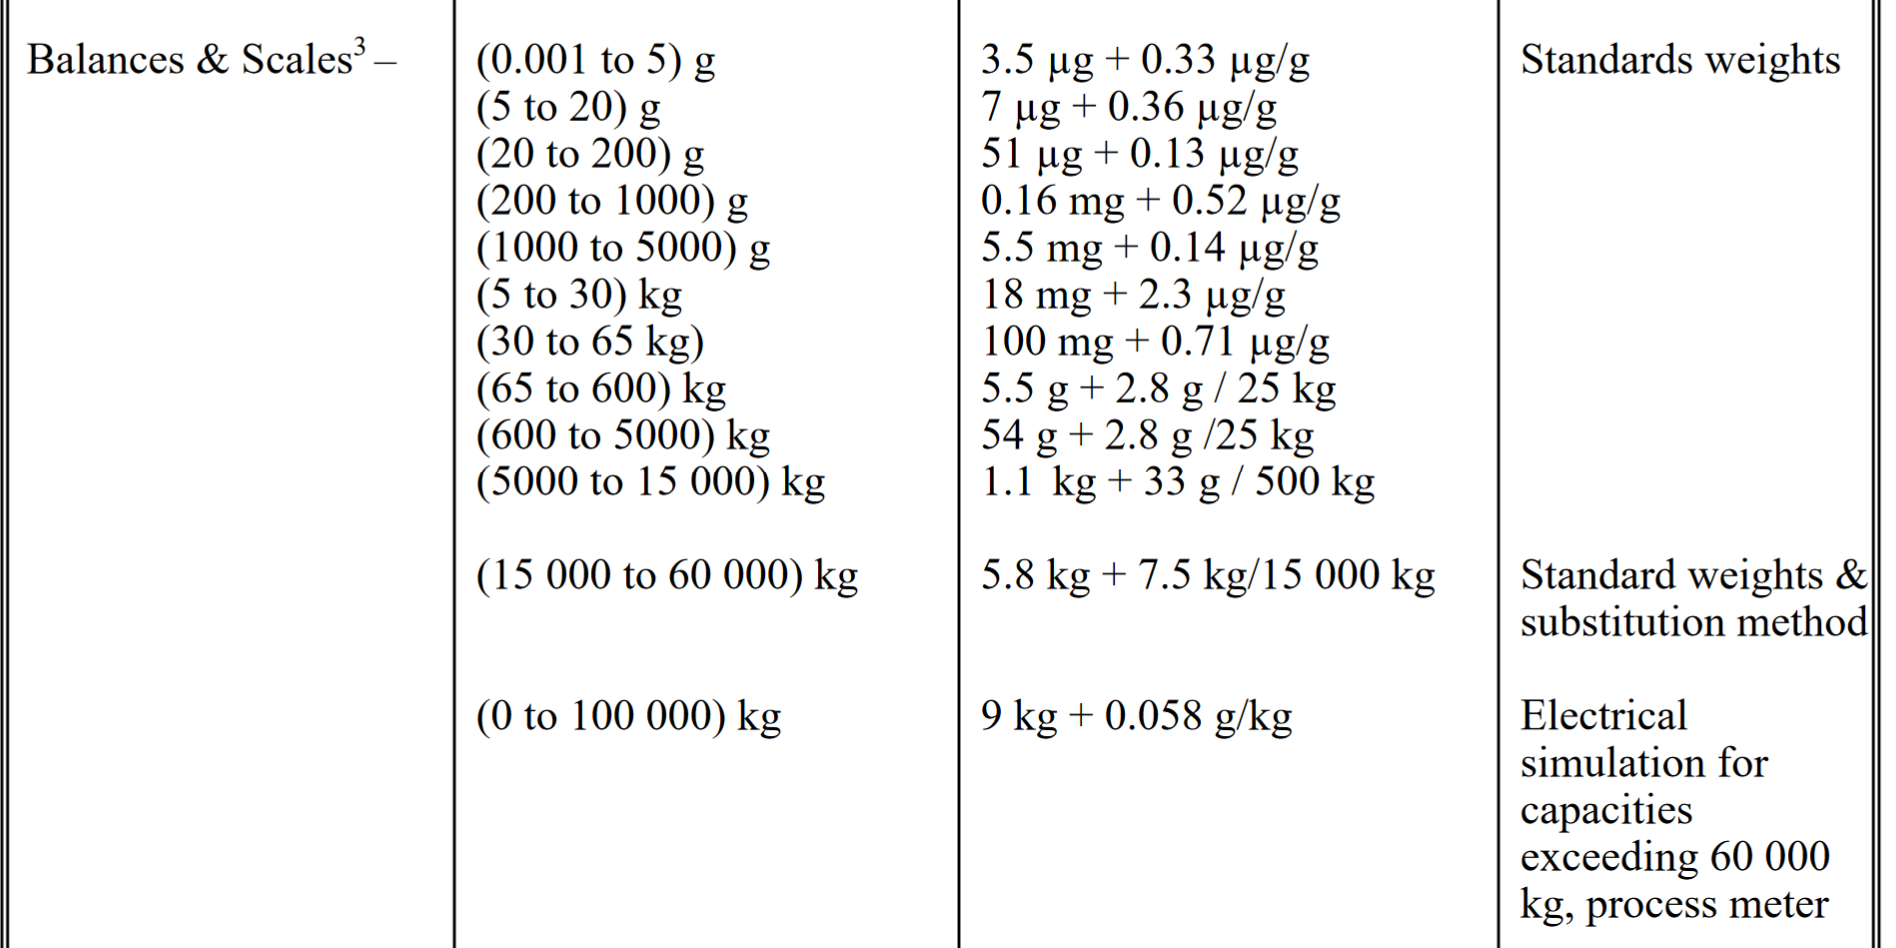
- **Extracción y Normalización de Datos**

Los datos extraídos del PDF incluyen 12 rangos de peso distintos, cada uno con su CMC asociado. Estos rangos estaban originalmente en diferentes unidades (gramos y kilogramos), lo que requería una normalización para su procesamiento efectivo. La normalización consistió en convertir todos los rangos a gramos, permitiendo así comparaciones y cálculos uniformes.

- **Estructura del JSON**

El formato JSON elegido para representar esta información consiste en una lista de objetos, cada uno correspondiente a un rango de peso y su CMC asociado. Cada objeto contiene campos para categoría, equipo, rango (con valores mínimos y máximos), CMC, comentarios y un **ID** único. Este **ID** facilita la referencia y acceso a los datos específicos en etapas posteriores de procesamiento.



    ID 1 for 0.001g to 5g
    ID 2 for 5.1g to 20g
    ID 3 for 20.1g to 200g
    ID 4 for 200.1g to 1000g
    ID 5 for 1000.1g to 5000g
    ID 6 for 5000g to 30000g
    ID 7 for 30100g to 65000g
    ID 8 for 65100g to 600000g
    ID 9 for 600100g to 5000000g
    ID 10 for 5000100g to 15000000g
    ID 11 for 15000010g to 60000000g
    ID 12 for over 60000010g



- **Implementación de la Búsqueda de Rangos**

Para utilizar estos datos en un contexto de programación, se implementó una función en Python que permite identificar el rango de peso adecuado para un valor nominal dado en gramos. La función itera a través de cada registro en los datos JSON, comparando el valor nominal con los límites de rango de cada registro. Cuando encuentra un rango que incluye el valor nominal, devuelve el ID y el CMC correspondiente.




In [ ]:
{
        "Categoria": "Mechanical",
        "Equipment": "Balances & Scales",
        "Range": {
            "Min": 20.1,
            "Max": 200,
            "Unit": "g"
        },
        "CMC": "51 \u03bcg + 0.13 \u03bcg/g",
        "Comments": "Standards weights",
        "ID": 3
    }

{'Categoria': 'Mechanical',
 'Equipment': 'Balances & Scales',
 'Range': {'Min': 20.1, 'Max': 200, 'Unit': 'g'},
 'CMC': '51 μg + 0.13 μg/g',
 'Comments': 'Standards weights',
 'ID': 3}

**Conclusión**
   - **Mejora la Consistencia de Datos:** Asegura que todos los registros sigan un formato uniforme, reduciendo errores humanos en la interpretación de los datos.
   - **Permite la Escalabilidad:** La estructura JSON es fácilmente escalable, permitiendo la adición de nuevos rangos o la modificación de los existentes sin alterar la estructura general.

#### Conversión de Datos de certificados **SampleCals**

El problema principal del archivo `SampleCals.JSON` era la **inconsistencia en la nomenclatura**, debido a errores ortográficos y a la mezcla de idiomas inglés y español. Esta variabilidad en los nombres de los grupos dificulta significativamente cualquier interacción con los datos, especialmente porque las diferencias en la denominación afectaban la agrupación y el análisis coherente.




En el análisis inicial del archivo JSON, identificamos la presencia de aproximadamente 270 grupos distintos, como nuestro enfoque principal se centró en los grupos relacionados con conceptos de "**Linealidad Ascendente**" y "**Linealidad Descendente**". Identificamos que había 20 grupos diferentes que, en esencia, representaban estas dos categorías. Para simplificar y estandarizar el conjunto de datos, llevamos a cabo un proceso de normalización de nombres, consolidando todos estos grupos variados en solo dos términos unificados: 'LinUp' para los grupos de Linealidad Ascendente y 'LinDown' para los de Linealidad Descendente.



La transformación se realizó de la siguiente manera:

-    'Weight - Lineality Down' cambió a 'LinDown'
-    'Weight - Lineality Up' cambió a 'LinUp'
-    'Weight - Linearity' cambió a 'Lin'
-    'Weight - Linearity Up' cambió a 'LinUp'
-    'Weight - Linearity DW' cambió a 'LinDown'
-    'Weight - Linearity Dn' cambió a 'LinDown'
-    'Weight - Linearity Down' cambió a 'LinDown'
-    'Weight - Linearity Dw' cambió a 'LinDown'
-    'Weight - Linearity UP' cambió a 'LinUp'
-    'Weight - Linearity Up' cambió a 'LinUp'
-    'Weight - Linearity dn' cambió a 'LinDown'
-    'Weight - Linearity down' cambió a 'LinDown'
-    'Weight - Linearity up' cambió a 'LinUp'
-    'Peso - Linealidad Dn' cambió a 'LinDown'
-    'Peso - Linealidad Up' cambió a 'LinUp'
-    'Peso - Lineaalidad Descendente' cambió a 'LinDown'
-    'Peso - Linealidad Ascendente' cambió a 'LinUp'
-   'Peso - Linealidad Decendente' cambió a 'LinDown'
-    'Peso - Linealidad Descendente' cambió a 'LinDown'
-    'Peso - Linealidad Desscendente' cambió a 'LinDown'

Esta transoformacion nos permitio el siguiente paso de extracción:

El archivo JSON original contiene una lista de objetos. Cada objeto representa un conjunto de datos relacionados con un equipo específico. Dentro de cada objeto, hay una clave `Datasheet` que contiene una lista de grupos de mediciones.



```
"CertNo": "C347830",
        "EquipmentType": "Scales & Balances",
        "AssetDescription": "Digital Belt Scale",
        "Manufacturer": "Nemesis",
        "Model": "HSC350",
        "OperatingRange": "See Datasheet",
        "AccreditationInfo": "This calibration is traceable to the International System of Units (SI), through National Metrology Institutes (NIST, PTB, NRC, NPL, etc.). This calibration conforms to the requirements of ISO/IEC 17025:2017. Results contained in this document relate only to the items tested or calibrated. The reported expanded uncertainty of measurement is stated as the standard uncertainty of measurement multiplied by the coverage factor k=2, such that the confidence level approximates 95%. The customer is responsible for assigning the calibration frequency if needed, and it does not imply that the conformity of the equipment with the specifications is maintained. This certificate shall not be reproduced except in full and with the written consent of Phoenix Calibration. The statement of conformity is based on simple acceptance, whether the calibration result is within or outside the manufacturer’s specification/acceptance limits, with the TUR expressed on the datasheet. It is the responsibility of the end user to determine if it is appropriate for your specific application. Pass: Results within limits. Fail: Results exceed limits. ",
        "Remarks": "Performed the routine of calibration,  all evaluated parameters were found in Tolerance. The result is Passed.",
        "Datasheet": [
            {
                "Group": "Weight - Linearity Dn",
                "Measurements": [
                    {
                        "Units": "g",
                        "MaximumPermissibleError": "2",
                        "Nominal": "1500.0",
                        "LowLimit": "1498.0",
                        "HighLimit": "1502.0",
                        "AsFound": "1499.0",
                        "AfterAdjustment": "",
                        "MeasUncert": "0.1",
                        "MeasUnit": "g",
                        "MeasParameter": "Weight",
                        "MeasSubParameter": "",
                        "TUR": ">10:1"
                    }
```



**Datos extraidos en "Measurements"**


Dentro de cada grupo en `Datasheet`, hay una lista de objetos bajo la clave `Measurements`. Cada objeto en `Measurements` representa un conjunto de datos de medición y tiene las siguientes claves:
- `Units`: La unidad de medida (por ejemplo, "g", "kg", "lb").
- `Nominal`: Un valor nominal de la medición.
- `MeasUncert`: La incertidumbre de la medición.

Utilizamos bucles anidados para iterar a través de la lista de objetos, luego a través de cada lista en Datasheet, y finalmente a través de cada objeto en Measurements. En cada iteración, realizamos las modificaciones descritas anteriormente.

Estructura utilizada en `SampleCals.json`



```
{
        "CertNo": "C350492",
        "EquipmentType": "Scales & Balances",
        "AssetDescription": "Digital Scale",
        "Model": "PA84",
        "OperatingRange": "0 to 85 g",
        "Datasheet": [
            {
                "Group": "LinDown",
                "Measurements": [
                    {
                        "Units": "g",
                        "Nominal": "63.9999530",
                        "MeasUncert": "0.00039"
                    },
                    {
                        "Units": "g",
                        "Nominal": "42.5000056",
                        "MeasUncert": "0.00039"
                    },
                    {
                        "Units": "g",
                        "Nominal": "21.0000040",
                        "MeasUncert": "0.00033"
                    },
                    {
                        "Units": "g",
                        "Nominal": "9.9999320",
                        "MeasUncert": "0.00027"
                    },
                    {
                        "Units": "g",
                        "Nominal": "4.9999940",
                        "MeasUncert": "0.00027"
                    },
                    {
                        "Units": "g",
                        "Nominal": "2.0000040",
                        "MeasUncert": "0.00023"
                    },
                    {
                        "Units": "g",
                        "Nominal": "1.0000020",
                        "MeasUncert": "0.00019"
                    }
```



#### Diseño y desarrollo de funciones **Codigo**

##### 1. Función `cargar_json`

 **Propósito**:  Cargar datos desde un archivo JSON

**Lógica**:

-    Utiliza un bloque try-except para manejar posibles errores al abrir o leer el archivo.
-    Abre el archivo en modo de lectura ('r') y usa json.load para convertir el contenido del archivo JSON en un objeto de Python (diccionario o lista).
-    Si ocurre un error (como un archivo no encontrado o un JSON mal formateado), lanza una excepción con un mensaje descriptivo.

##### 2. Función `buscar_en_sample_cals`

 **Propósito**: Buscar el 'Meas Uncert' correspondiente a un certificado específico en los datos de SampleCals

**Lógica**:

-    Utiliza un bloque try-except para manejar posibles errores al abrir o leer el archivo.
-    Abre el archivo en modo de lectura ('r') y usa json.load para convertir el contenido del archivo JSON en un objeto de Python (diccionario o lista).
-    Si ocurre un error (como un archivo no encontrado o un JSON mal formateado), lanza una excepción con un mensaje descriptivo.

##### 3. Función `convertir_a_gramos`

 **Propósito**: Convertir un valor a gramos desde diferentes unidades (gramos, kilogramos, libras).

**Lógica**:

-    Utiliza un diccionario conversiones para mapear cada unidad a su factor de conversión correspondiente.
-    Obtiene el factor de conversión para la unidad proporcionada. Si la unidad no se encuentra en el diccionario, lanza una excepción.
-    Multiplica el valor por el factor de conversión para obtener el valor en gramos.

##### 4. Función `identificar_id_en_certificado_balance`

 **Propósito**:  Identificar el ID y el CMC correspondientes en CertificadoBalance.json para un valor nominal dado en gramos.

**Lógica**:

-    Itera a través de cada registro en certificado_balance_data.
-    Convierte los límites de rango (Min y Max) a flotantes para una comparación precisa.
-    Verifica si el valor nominal proporcionado cae dentro del rango de cada registro.
-    Si se encuentra una coincidencia, devuelve el ID y el CMC del registro.
-    Si no se encuentra ninguna coincidencia, lanza una excepción.

##### 5. Función `convertir_unidad_a_gramos`

 **Propósito**:  Convertir valores con unidades complejas a gramos, incluyendo unidades compuestas como 'g / 25 kg'.

**Lógica**:

-    Maneja unidades estándar (como μg, mg, g, kg) y unidades compuestas.
-    Para unidades compuestas, separa la unidad base de la unidad de referencia (como 'g' y '25 kg' en 'g / 25 kg').
-    Extrae el número de la unidad de referencia (por ejemplo, 25 en '25 kg') y lo utiliza para ajustar el valor base.
-    En el caso de unidades estándar, simplemente multiplica el valor por el factor de conversión correspondiente.
-    Maneja casos especiales donde no hay un número explícito en la unidad de referencia, asumiendo un factor de 1.

##### 6. Función `extraer_cmc_fijo_proporcional`

 **Propósito**:  Extraer los componentes fijo y proporcional del CMC de una cadena dada.

**Lógica**:

-    Convierte el CMC fijo y proporcional a gramos usando convertir_unidad_a_gramos.
-    Calcula el CMC total sumando el CMC fijo y el producto del CMC proporcional por el valor nominal.
-    Calcula la incertidumbre combinada usando la suma cuadrática del CMC total y el 'Meas Uncert'.
-    Formatea y devuelve la incertidumbre combinada en diferentes unidades (gramos, miligramos, microgramos).

#### Impresión funciones.

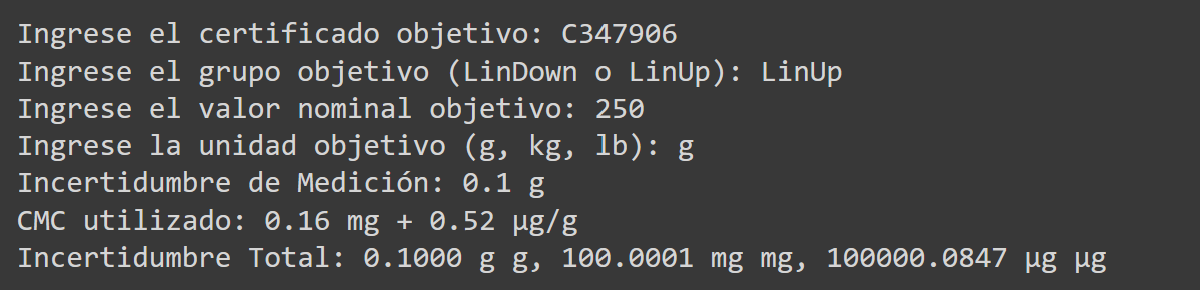

#### Replit / Flask / VoiceFlow

Una vez definidas y probadas las funciones el siguiente paso es trasladarlos a nuestro entorno.

  - **Inicialización del Proyecto en Replit con Flask**

Se configuró un entorno virtual y se instaló Flask junto con otras dependencias necesarias. Se creó `app.py` como el archivo principal de la aplicación para definir rutas y funcionalidades.

  -   - **Funciones de Carga y Procesamiento de JSON**
Funciones definidas anteriormente se implementaron para interactuar con los datos de los archivos JSON.

 - **Configuración de Logging para Capturar Errores**
Se utilizó el módulo logging para registrar errores y actividad, facilitando la identificación de problemas en el servidor.

- **Pruebas de la API con Postman**
Se realizaron pruebas enviando solicitudes POST a la ruta /calcular utilizando Postman, estableciendo el Content-Type como application/json y añadiendo el cuerpo de la solicitud en formato JSON.



```
Ejemplo de Cuerpo de Solicitud en Postman

json

{
    "certificado_objetivo": "12345",
    "grupo_objetivo": "Grupo1",
    "nominal_objetivo": 100,
    "unidad_objetivo": "g"
}

```



---

- **Configuración de Voiceflow para Captura y Manejo de Respuestas**


Se asignaron las claves específicas de la respuesta JSON a variables de Voiceflow para ser utilizadas en el diálogo.



```
Ejemplo de Configuración de Capture Response en Voiceflow

plaintext

Enter Key: Incertidumbre de Medición
Apply To: responseIncertidumbreMedicion
```



- - **Flujo de Conversación y Presentación de Datos al Usuario**

Se configuraron bloques "Speak" para utilizar las variables capturadas y comunicar los resultados de la API al usuario.

 -   - **Diagrama de Flujo de Datos (Texto Descriptivo)**

El usuario proporciona datos a través de una serie de pasos de captura, los cuales se envían a la API de Flask. La API procesa estos datos y devuelve resultados que Voiceflow captura y presenta al usuario.